#  Distribution of supplies to combat COVID-19 in Brazil - Publishing Interactive Plots 

Data for this study were collected from the Brazilian Open Data Portal

#### Mechanical Ventilators distribution (link below in Portuguese)
- [Source](https://dados.gov.br/dataset/distribuicao-de-respiradores)

#### Distribution of PPEs
- [Source](https://dados.gov.br/dataset/distribuicao-de-equipamentos-de-protecao-individual-e-insumos-covid-19)


# Part 1: Mechanical Ventilators

## Getting to know the data

In [4]:
!pip install datapane

In [5]:
!pip install plotly

In [13]:
#Data Analysis
import pandas as pd
import numpy as np 

#Data Visualization (Static Visualizations)
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 10})
import seaborn as sns

#Interactive visualizations
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

#Report Publishing
import datapane as dp

In [31]:
df_vent = pd.read_csv('distribuicao_respiradores.csv', sep=';', decimal= ',')
df_vent.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,19/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,"2400000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,19/04/2020
1,22/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,"1200000,00",LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,RJ,23/04/2020
2,08/05/2020,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,"1500000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
3,08/05/2020,KTK,RIO DE JANEIRO,ESTADO,UTI,15,"900000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
4,09/05/2020,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,"360000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020


Coverting decimals from , to . : 

In [32]:
df_vent['VALOR'] = df_vent['VALOR'].str.replace(",", ".").astype(float)
df_vent.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,19/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,2400000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,19/04/2020
1,22/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,1200000.0,LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,RJ,23/04/2020
2,08/05/2020,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,1500000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
3,08/05/2020,KTK,RIO DE JANEIRO,ESTADO,UTI,15,900000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
4,09/05/2020,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,360000.0,ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020


### Translating column names

In [33]:
df_vent.columns = ['DATE', 'SUPPLIER', 'DESTINATION', 'STATE/MUNICIPALITY', 'TYPE', 'QUANTITY', 'COST', 'ADDRESS', 'STATE', 'DELIVERY DATE']

In [34]:
print(df_vent.columns.tolist())

['DATE', 'SUPPLIER', 'DESTINATION', 'STATE/MUNICIPALITY', 'TYPE', 'QUANTITY', 'COST', 'ADDRESS', 'STATE', 'DELIVERY DATE']


#### Deleting unecessary data

In [35]:
df_vent.drop(['DATE', 'ADDRESS', 'STATE'], axis = 1, inplace=True)

In [36]:
df_vent.dtypes

SUPPLIER               object
DESTINATION            object
STATE/MUNICIPALITY     object
TYPE                   object
QUANTITY                int64
COST                  float64
DELIVERY DATE          object
dtype: object

In [37]:
df_vent.shape

(1730, 7)

#### Deleting duplicated data

In [38]:
df_vent.duplicated().sum()

491

In [39]:
df_vent = df_vent.drop_duplicates()

In [40]:
df_vent.shape

(1239, 7)

In [41]:
df_vent['COST'].sum()

588748524.8100001

In [42]:
df_vent.isnull().sum()

SUPPLIER              0
DESTINATION           0
STATE/MUNICIPALITY    0
TYPE                  0
QUANTITY              0
COST                  0
DELIVERY DATE         0
dtype: int64

In [43]:
df_vent.isna().sum()

SUPPLIER              0
DESTINATION           0
STATE/MUNICIPALITY    0
TYPE                  0
QUANTITY              0
COST                  0
DELIVERY DATE         0
dtype: int64

In [44]:
df_vent['QUANTITY'].sum()

11114

In [45]:
df_vent['DESTINATION'].unique()

array(['RIO DE JANEIRO', 'ALAGOAS', 'BAHIA', 'DISTRITO FEDERAL',
       'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'ACRE', 'GOIAS', 'RONDONIA', 'RORAIMA', 'PARA', 'TOCANTINS',
       'AMAZONAS', 'AMAPA', 'PIAUI', 'PERNAMBUCO', 'PARAIBA', 'SERGIPE',
       'CEARA', 'RIO GRANDE DO NORTE', 'ESPIRITO SANTO ', 'SÃO PAULO',
       'RIO GRANDE DO SUL ', 'SANTA CATARINA', 'PARANA', 'LIBANO'],
      dtype=object)

Checking the row indicating destination = Líbano (Lebanon)

In [46]:
df_vent[df_vent['DESTINATION']=='LIBANO']

,SUPPLIER,DESTINATION,STATE/MUNICIPALITY,TYPE,QUANTITY,COST,DELIVERY DATE
1729,MAGNAMED,LIBANO,-,TRANSPORTE,300,14487000.0,08/08/2020


This row refers to a donation made by the Brazilian government to Lebanon after the explosion that occured in Beirut this year. 

In [47]:
df_vent.drop(1729,0,inplace=True)

In [48]:
df_vent['QUANTITY'].sum()

10814

#### Information on Suppliers

In [50]:
df_vent['SUPPLIER'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'LEISTUNG/VYAIRE',
       'KTK/VAYIRE', 'WEG', 'VYAIRE LTV 2200 USA', 'UTI',
       'VYAIRE LTV 1200 USA', 'MAGNAMED-REQUISIÇÃO',
       'SUZANO/Zhongxun Medical', 'SUZANO/Resmed',
       'L C DADDE COM AT INST MAT MEDICO EPP', 'MAGNAMED/REQUISIÇÃO',
       'Leistung'], dtype=object)

We have different labels for the same supplier. It will be necessary to standardize : 

In [51]:
df_vent['SUPPLIER'] = df_vent['SUPPLIER'].replace(['MAGNAMED-REQUISIÇÃO', 'MAGNAMED/REQUISIÇÃO', 'VYAIRE LTV 1200 USA', 'VYAIRE LTV 2200 USA', 'L C DADDE COM AT INST MAT MEDICO EPP', 'Leistung' ], ['MAGNAMED', 'MAGNAMED', 'VYAIRE', 'VYAIRE', 'APOLLO MEDICAL', 'LEISTUNG' ])

In [52]:
df_vent['SUPPLIER'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'LEISTUNG/VYAIRE',
       'KTK/VAYIRE', 'WEG', 'UTI', 'SUZANO/Zhongxun Medical',
       'SUZANO/Resmed', 'APOLLO MEDICAL'], dtype=object)

In [53]:
df_vent['SUPPLIER'].value_counts()

MAGNAMED                   528
VYAIRE                     408
KTK                        192
LEISTUNG                    74
WEG                         30
APOLLO MEDICAL               1
KTK/VAYIRE                   1
SUZANO/Zhongxun Medical      1
LEISTUNG/VYAIRE              1
SUZANO/Resmed                1
UTI                          1
Name: SUPPLIER, dtype: int64

Grouping the data to improve visualization : 

In [54]:
df_vent['SUPPLIER'] = df_vent['SUPPLIER'].replace(['APOLLO MEDICAL', 'KTK/VAYIRE', 'SUZANO/Resmed', 'SUZANO/Zhongxun Medical', 'LEISTUNG/VYAIRE', 'UTI'], 'VÁRIOS')

In [55]:
df_vent['SUPPLIER'].unique()

array(['VYAIRE', 'MAGNAMED', 'KTK', 'LEISTUNG', 'VÁRIOS', 'WEG'],
      dtype=object)

#### Types of Ventilators

In [57]:
df_vent['TYPE'].unique()

array(['UTI', 'TRANSPORTE', 'TRANSPORTE USA', 'Transporte USA',
       'Transporte'], dtype=object)

Again, there are repeated labels for the same information. 

In [77]:
df_vent['TYPE']=df_vent['TYPE'].replace(['TRANSPORTE USA', 'TRANSPORTE','Transporte USA', 'Transporte', 'UTI'], ['TRANSPORT', 'TRANSPORT', 'TRANSPORT', 'TRANSPORT', 'ICU'])

In [78]:
df_vent['TYPE'].unique()

array(['ICU', 'TRANSPORT'], dtype=object)

#### Creating a column for regions

Brazil has 26 states divided into 5 main regions:
- North
- Northeast 
- Southwest
- Middle-west
- South

Visualizing the data by region may provide powerful insights on the data, because the country has higher HDI in the South and Southwest regions. Southwest region is the economical core of the country, it is where the states of Rio de Janeiro and São Paulo are located. 
North and Norteast are more vunerable as the economical and human development indicatiors in these regions are lower. 
Middle-west is an intermediate region. This is where the capital city of the country is located. In regards to population is not as densely populated as the Southwest and the main economical actitivty in this region is the agriculture. 

In [60]:
df_vent['DESTINATION'].unique()

array(['RIO DE JANEIRO', 'ALAGOAS', 'BAHIA', 'DISTRITO FEDERAL',
       'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'ACRE', 'GOIAS', 'RONDONIA', 'RORAIMA', 'PARA', 'TOCANTINS',
       'AMAZONAS', 'AMAPA', 'PIAUI', 'PERNAMBUCO', 'PARAIBA', 'SERGIPE',
       'CEARA', 'RIO GRANDE DO NORTE', 'ESPIRITO SANTO ', 'SÃO PAULO',
       'RIO GRANDE DO SUL ', 'SANTA CATARINA', 'PARANA'], dtype=object)

In [64]:
dict={'RIO DE JANEIRO': 'SOUTHWEST', 'SÃO PAULO':'SOUTHWEST', 'RIO GRANDE DO SUL ':'SOUTH', 'PARANA':'SOUTH', 'MINAS GERAIS':'SOUTHWEST', 'ESPIRITO SANTO ':'SOUTHWEST', 'SANTA CATARINA':'SOUTH', 'ACRE':'NORTH', 'AMAPA':'NORTH', 'AMAZONAS':'NORTH', 'RORAIMA':'NORTH', 'RONDONIA':'NORTH', 'PARA':'NORTH', 'TOCANTINS':'MIDDLE-WEST', 'DISTRITO FEDERAL':'MIDDLE-WEST', 'MATO GROSSO DO SUL':'MIDDLE-WEST', 'MATO GROSSO ':'MIDDLE-WEST', 'GOIAS':'MIDDLE-WEST', 'ALAGOAS':'NORTHEAST', 'BAHIA':'NORTHEAST', 'SERGIPE':'NORTHEAST', 'RIO GRANDE DO NORTE':'NORTHEAST', 'PIAUI':'NORTHEAST', 'MARANHÃO':'NORTHEAST', 'CEARA':'NORTHEAST', 'PARAIBA':'NORTHEAST', 'PERNAMBUCO':'NORTHEAST'}

In [65]:
df_vent['REGION']=df_vent['DESTINATION'].map(dict)
df_vent.head()

,SUPPLIER,DESTINATION,STATE/MUNICIPALITY,TYPE,QUANTITY,COST,DELIVERY DATE,REGION
0,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,2400000.0,19/04/2020,SOUTHWEST
1,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,1200000.0,23/04/2020,SOUTHWEST
2,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,1500000.0,09/05/2020,SOUTHWEST
3,KTK,RIO DE JANEIRO,ESTADO,UTI,15,900000.0,09/05/2020,SOUTHWEST
4,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,360000.0,09/05/2020,SOUTHWEST


In [66]:
df_vent['REGION'].unique()

array(['SOUTHWEST', 'NORTHEAST', 'MIDDLE-WEST', 'NORTH', 'SOUTH'],
      dtype=object)

#### STATE/MUNICIPALITY column

In [67]:
df_vent['STATE/MUNICIPALITY'].unique()

array(['ESTADO', 'MUNICIPIO', 'ESTADO '], dtype=object)

In [68]:
df_vent['STATE/MUNICIPALITY']=df_vent['STATE/MUNICIPALITY'].replace(['ESTADO ', 'ESTADO', 'MUNICIPIO'], ['STATE', 'STATE', 'MUNICIPALITY'])
df_vent['STATE/MUNICIPALITY'].unique()

array(['STATE', 'MUNICIPALITY'], dtype=object)

### Extracting month of delivery of supplies

In [69]:
df_vent['DELIVERY DATE'] = pd.to_datetime(df_vent['DELIVERY DATE'], errors='coerce')

In [70]:
df_vent['MONTH'] = pd.DatetimeIndex(df_vent['DELIVERY DATE']).month

## Static Visualizations for Distribution of Ventilators

In [71]:
df_vent.head()

,SUPPLIER,DESTINATION,STATE/MUNICIPALITY,TYPE,QUANTITY,COST,DELIVERY DATE,REGION,MONTH
0,VYAIRE,RIO DE JANEIRO,STATE,UTI,40,2400000.0,2020-04-19,SOUTHWEST,4.0
1,VYAIRE,RIO DE JANEIRO,STATE,UTI,20,1200000.0,2020-04-23,SOUTHWEST,4.0
2,MAGNAMED,RIO DE JANEIRO,STATE,UTI,25,1500000.0,2020-09-05,SOUTHWEST,9.0
3,KTK,RIO DE JANEIRO,STATE,UTI,15,900000.0,2020-09-05,SOUTHWEST,9.0
4,LEISTUNG,RIO DE JANEIRO,STATE,UTI,6,360000.0,2020-09-05,SOUTHWEST,9.0


In [72]:
df_vent.describe()

,QUANTITY,COST,MONTH
count,1238.000000,1.238000e+03,1235.000000
mean,8.735057,4.638623e+05,6.678543
std,13.059379,7.352837e+05,2.610194
min,1.000000,2.000000e+04,1.000000
25%,2.000000,9.658000e+04,5.000000
50%,5.000000,2.400000e+05,7.000000
75%,10.000000,4.829000e+05,8.000000
max,150.000000,7.243500e+06,12.000000


### Types of ventilators

In [80]:
df_gp_tp = df_vent.groupby('TYPE').sum().reset_index()
df_gp_tp['UNIT_COST'] = df_gp_tp['COST']/df_gp_tp['QUANTITY']
df_gp_tp.head()

,TYPE,QUANTITY,COST,MONTH,UNIT_COST
0,ICU,5781,3.492635e+08,3879.0,60415.762827
1,TRANSPORT,5033,2.249980e+08,4369.0,44704.549952


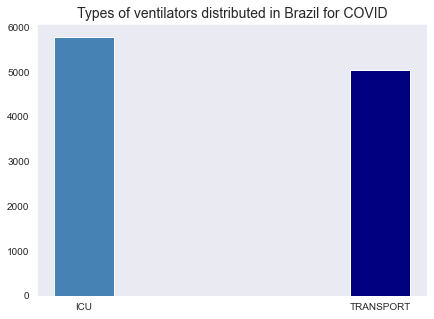

In [81]:
sns.set_style("dark")
plt.figure(figsize = (7,5))
plt.bar(df_gp_tp['TYPE'], df_gp_tp['QUANTITY'],  width=0.2, color=['steelblue', 'navy'])
plt.title('Types of ventilators distributed in Brazil for COVID', fontsize= 14)
plt.show()

#### By regions

In [82]:
dfgrouped = df_vent.groupby('REGION').sum().reset_index().sort_values('QUANTITY', ascending=False)
dfgrouped['UNIT_COST']=dfgrouped['COST']/dfgrouped['QUANTITY']
dfgrouped2 = dfgrouped.sort_values('UNIT_COST',ascending=False).reset_index()

Text(0.5, 1.0, 'Unit cost of ventilators by region')

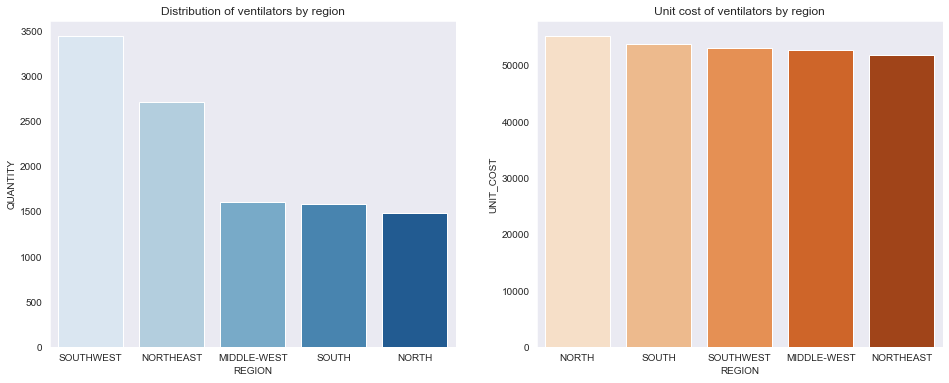

In [83]:
sns.set_style("dark")

fig, axes = plt.subplots(1, 2, figsize = (16,6))

sns.barplot(ax =axes[0], data=dfgrouped, x='REGION', y='QUANTITY', palette='Blues')
axes[0].set_title('Distribution of ventilators by region')

sns.barplot(ax= axes[1], data=dfgrouped2, x='REGION', y='UNIT_COST', palette='Oranges')
axes[1].set_title('Unit cost of ventilators by region')

#### By state

In [84]:
dfgrouped_r = df_vent.groupby('DESTINATION').sum().reset_index().sort_values('QUANTITY', ascending=False)
dfgrouped_r['UNIT_COST']=dfgrouped_r['COST']/dfgrouped_r['QUANTITY']
dfgrouped_r.head()

,DESTINATION,QUANTITY,COST,MONTH,UNIT_COST
18,RIO DE JANEIRO,1412,73802492.66,677.0,52268.054292
25,SÃO PAULO,1001,54532058.94,367.0,54477.581359
20,RIO GRANDE DO SUL,812,44630012.23,682.0,54963.069249
12,MINAS GERAIS,772,41948651.48,651.0,54337.631451
4,BAHIA,663,34520859.70,706.0,52067.661689


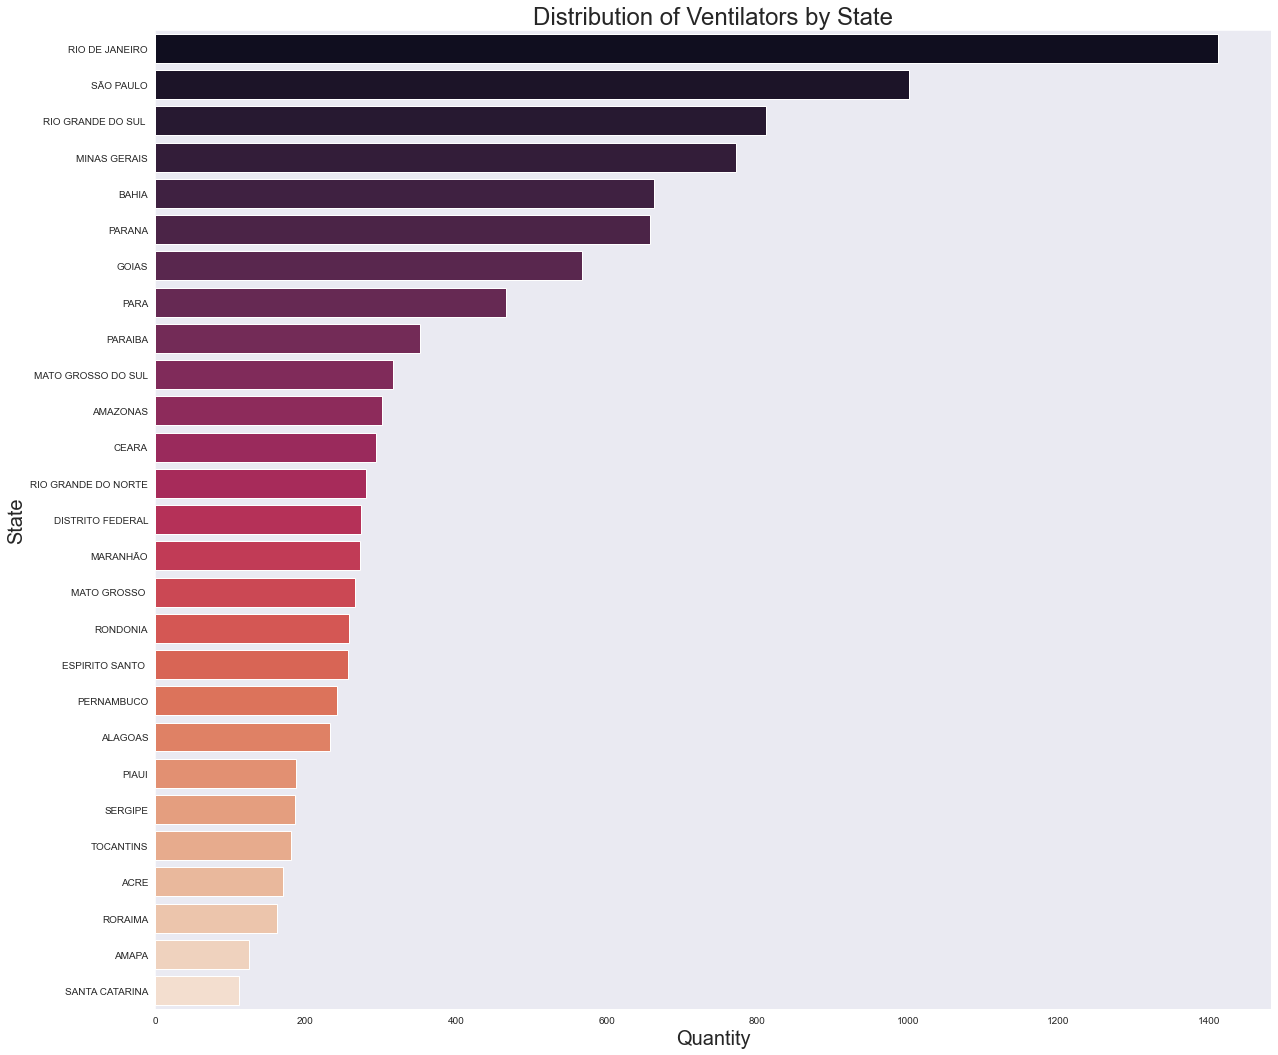

In [85]:
plt.figure(figsize = (20,18))
sns.barplot(data=dfgrouped_r,  x='QUANTITY', y='DESTINATION', ci=None, palette='rocket')
plt.title('Distribution of Ventilators by State', fontsize= 24)
plt.xlabel('Quantity', fontsize = 20)
plt.ylabel('State', fontsize=20);



#### By Supplier

In [86]:
dfgrouped_f = df_vent.groupby('SUPPLIER').sum().reset_index().sort_values('QUANTITY', ascending=False)
dfgrouped_f['UNIT_COST']=dfgrouped_f['COST']/dfgrouped_f['QUANTITY']

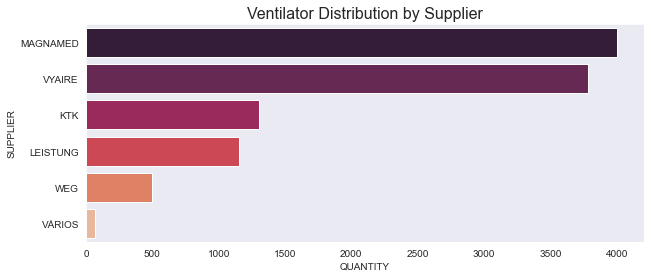

In [88]:
sns.set_style("dark")
plt.figure(figsize = (10,4))
sns.barplot(data = dfgrouped_f, x = 'QUANTITY', y = 'SUPPLIER', ci = None, palette = 'rocket')
plt.title('Ventilator Distribution by Supplier', fontsize= 16)
plt.show()

# Part 2: Personal Protective Equipment

## Getting to know the dataset

In [89]:
df_ppe = pd.read_csv('epi.csv', sep=';', decimal=',')
df_ppe.head()

,Material,Dt.Saída,Nº Pedido,Requisitante / Destino,Unidade,Quantidade,Status
0,Álcool,19/03/2020,308748,Acre,Litro,9.6,Entregue
1,Álcool,19/03/2020,308748,Acre,Litro,42.0,Entregue
2,Álcool,19/03/2020,308499,Acre,Litro,12.0,Entregue
3,Álcool,19/03/2020,308500,Acre,Litro,12.0,Entregue
4,Álcool,25/03/2020,309483,Acre,Litro,48.0,Entregue


#### Translating the columns

In [91]:
df_ppe.columns = ['PRODUCT', 'DATE', 'ORDER_NUMBER', 'DESTINATION', 'MEASUREMENT_UNIT', 'QUANTITY', 'STATUS']

In [92]:
df_ppe.drop('ORDER_NUMBER', axis=1, inplace=True)

In [93]:
df_ppe.shape

(6404, 6)

In [94]:
df_ppe.dtypes

PRODUCT              object
DATE                 object
DESTINATION          object
MEASUREMENT_UNIT     object
QUANTITY            float64
STATUS               object
dtype: object

In [95]:
df_ppe['QUANTITY'].sum()

315458209.8

In [96]:
df_ppe['PRODUCT'].unique()

array(['Álcool', 'Avental', 'Luva', 'Máscara Cirúrgica', 'Máscara N95',
       'Óculos e Protetor Facial', 'Sapatilha e Touca', 'Teste Rápido'],
      dtype=object)

Translating Product names:

In [100]:
df_ppe['PRODUCT'] = df_ppe['PRODUCT'].replace(['Álcool', 'Avental', 'Luva', 'Máscara Cirúrgica', 'Máscara N95',
       'Óculos e Protetor Facial', 'Sapatilha e Touca', 'Teste Rápido'], ['Alcohol', 'Disposable clothing', 'Gloves', 'Surgical Mask', 'N95 masks', 'Glasses and Face Shield', 'Disposable shoes cover/caps ', 'COVID rapid tests'])

In [102]:
df_ppe['PRODUCT'].unique()

array(['Alcohol', 'Disposable clothing', 'Gloves', 'Surgical Mask',
       'N95 masks', 'Glasses and Face Shield',
       'Disposable shoes cover/caps ', 'COVID rapid tests'], dtype=object)

In [101]:
df_ppe['DESTINATION'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais',
       'Outros Órgãos Federais', 'Pará', 'Paraíba', 'Paraná',
       'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina',
       'São Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [106]:
df_ppe.isna().sum()

PRODUCT             0
DATE                0
DESTINATION         0
MEASUREMENT_UNIT    0
QUANTITY            0
STATUS              0
dtype: int64

In [107]:
df_ppe.duplicated().sum()

1160

In [108]:
df_ppe.drop_duplicates()

,PRODUCT,DATE,DESTINATION,MEASUREMENT_UNIT,QUANTITY,STATUS
0,Alcohol,19/03/2020,Acre,Litro,9.6,Entregue
1,Alcohol,19/03/2020,Acre,Litro,42.0,Entregue
2,Alcohol,19/03/2020,Acre,Litro,12.0,Entregue
4,Alcohol,25/03/2020,Acre,Litro,48.0,Entregue
5,Alcohol,28/03/2020,Acre,Litro,19.2,Entregue
...,...,...,...,...,...,...
6399,COVID rapid tests,03/11/2020,Distrito Federal,Teste,150000.0,Entregue
6400,COVID rapid tests,29/10/2020,Outros Órgãos Federais,Teste,2300.0,Entregue
6401,COVID rapid tests,12/11/2020,Rio de Janeiro,Teste,140.0,Entregue
6402,COVID rapid tests,14/11/2020,Rio de Janeiro,Teste,136580.0,Entregue


### Convertendo a data para datetime

In [223]:
df_ppe['DATE'] = pd.to_datetime(df_ppe['DATE'])

In [109]:
df_ppe['MONTH'] = pd.DatetimeIndex(df_ppe['DATE']).month
df_ppe.head()

,PRODUCT,DATE,DESTINATION,MEASUREMENT_UNIT,QUANTITY,STATUS,MONTH
0,Alcohol,19/03/2020,Acre,Litro,9.6,Entregue,3
1,Alcohol,19/03/2020,Acre,Litro,42.0,Entregue,3
2,Alcohol,19/03/2020,Acre,Litro,12.0,Entregue,3
3,Alcohol,19/03/2020,Acre,Litro,12.0,Entregue,3
4,Alcohol,25/03/2020,Acre,Litro,48.0,Entregue,3


In [110]:
df_ppe_ordered = df_ppe.groupby('DATE').sum().reset_index().sort_values('DATE', ascending=True)

In [111]:
df_ppe_ordered.tail()

,DATE,QUANTITY,MONTH
95,30/09/2020,540.0,18
96,31/03/2020,18452909.0,885
97,31/05/2020,79350.0,40
98,31/07/2020,10790.0,266
99,31/08/2020,1800000.0,8


In [113]:
dfppe_gp = df_ppe.groupby('PRODUCT').sum().reset_index().sort_values('QUANTITY', ascending=False)
dfppe_gp.head()

,PRODUCT,QUANTITY,MONTH
7,Surgical Mask,212636050.0,7980
5,Gloves,38870500.0,4040
6,N95 masks,28886265.0,7108
3,Disposable shoes cover/caps,20320400.0,3904
1,COVID rapid tests,8629080.0,2537


Text(0.5, 1.0, 'PPEs distributed by Brazilian Government to combat COVID-19')

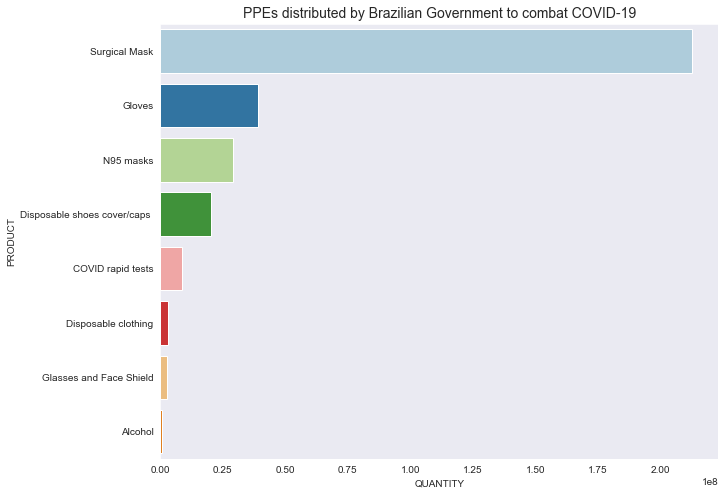

In [114]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
sns.barplot(data=dfppe_gp, y='PRODUCT', x='QUANTITY', palette='Paired')
plt.title('PPEs distributed by Brazilian Government to combat COVID-19', fontsize= 14)

# Part 3: Interactive Plots

In [147]:
dp.login(token='your-token-here')

### Figure 1: Types of ventilators

In [116]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=df_gp_tp['TYPE'], y=df_gp_tp['QUANTITY'], marker = {'color': 'cornflowerblue',
                         'line': {'color': 'midnightblue','width': 2}}, opacity= 0.8)]
#Layout configuration
config_lay = go.Layout(title='<b>Types of Ventilators Distributed</b>',yaxis={'title':'Quantity'},
                                 xaxis={'title':'Region'}, height=400, width=500)


fig1 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig1)

In [117]:
dp.Report(dp.Plot(fig1), dp.Table(df_gp_tp)).publish(name='Types of ventilators distributed in Brazil to combat COVID-19', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/types-of-ventilators-distributed-in-brazil-to-combat-covid-19/


### Figure 2: Number of ventilators distributed by region

In [118]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=dfgrouped['REGION'], y=dfgrouped['QUANTITY'], marker = {'color': 'slateblue',
                         'line': {'color': 'midnightblue','width': 2}}, opacity= 0.8)]
#Layout configuration
config_lay = go.Layout(title='<b>Number of ventilators distributed by region in Brazil in 2020</b>',yaxis={'title':'Quantity'},
                                 xaxis={'title':'Region'})
fig2 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig2)

In [119]:
dp.Report(dp.Plot(fig2), dp.Table(dfgrouped)).publish(name='Distribution of ventilators for COVID in Brazil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/distribution-of-ventilators-for-covid-in-brazil/


### Figura 3: Unit cost of ventilators by region

In [121]:
#  Selecting data and configuring width and opacity
data = [go.Bar(x=dfgrouped2['REGION'], y=dfgrouped2['UNIT_COST'], marker = {'color': 'firebrick',
                         'line': {'color': 'darkred','width': 2}}, opacity= 0.6)]
#Layout configuration
config_lay = go.Layout(title='<b>Unit cost of ventilators by region</b>',yaxis={'title':'Unit average cost (R$)'},
                                 xaxis={'title':'Region'})
fig3 = go.Figure(data=data, layout=config_lay)

#Creating graph
py.iplot(fig3)

In [122]:
dp.Report(dp.Plot(fig3)).publish(name='Unit cost of ventilators by region', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/unit-cost-of-ventilators-by-region/


### Figure 4 - Distribution of ventilators by month

In [123]:
df_mth = df_vent.groupby('MONTH').sum().reset_index()
df_mth.head()

,MONTH,QUANTITY,COST
0,1.0,594,33283825.07
1,2.0,274,15068900.00
2,3.0,482,24074513.58
3,4.0,427,26011374.90
4,5.0,1888,97519698.65


In [124]:
fig4 = px.line(df_mth, x="MONTH", y="QUANTITY" , title = '<b>Distribution of ventilators by month</b>')
fig4.data[0].update(mode='markers+lines')
fig4.show()

### Figura 5: Expenditure by month with ventilators

In [125]:
df_mth = df_vent.groupby('MONTH').sum().reset_index()
df_mth.head()

,MONTH,QUANTITY,COST
0,1.0,594,33283825.07
1,2.0,274,15068900.00
2,3.0,482,24074513.58
3,4.0,427,26011374.90
4,5.0,1888,97519698.65


In [126]:
fig5 = px.line(df_mth, x="MONTH", y="COST" , title = '<b>Expenditure by month with ventilators</b>')
fig5.data[0].update(mode='markers+lines')
fig5.show()

### Figure 6: Monthly expenditure on ventilators by region

In [127]:
df_mth2 = df_vent.groupby(['MONTH','REGION']).sum().reset_index()
df_mth2.head()

,MONTH,REGION,QUANTITY,COST
0,1.0,MIDDLE-WEST,48,2730895.97
1,1.0,NORTH,58,2525800.00
2,1.0,NORTHEAST,197,10789520.00
3,1.0,SOUTH,26,1360930.00
4,1.0,SOUTHWEST,265,15876679.10


In [128]:
fig6 = px.line(df_mth2, x="MONTH", y="COST", color='REGION', title = '<b>Monthly expenditure on ventilators by region</b>', width=900, height=500)
fig6.update_traces(mode='markers+lines')


fig6.show()

In [130]:
dp.Report(dp.Plot(fig6), dp.Table(df_mth2)).publish(name='Monthly expenditure on ventilators by region', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/monthly-expenditure-on-ventilators-by-region/


### Figure 7: Number of ventilators distributed in Brazil for COVID by supplier

In [131]:
dfgrouped_f.head()

,SUPPLIER,QUANTITY,COST,MONTH,UNIT_COST
2,MAGNAMED,4005,1.995960e+08,3457.0,49836.714107
3,VYAIRE,3787,2.291050e+08,2728.0,60497.744893
0,KTK,1302,4.004000e+07,1329.0,30752.688172
1,LEISTUNG,1156,6.927700e+07,500.0,59928.200692
5,WEG,496,2.976000e+07,205.0,60000.000000


In [134]:
data = [go.Bar(x=dfgrouped_f['QUANTITY'], y=dfgrouped_f['SUPPLIER'], orientation='h', marker = {'color': 'mediumorchid','line': {'color': 'indigo','width': 2}}, opacity= 0.7)]

config_lay = go.Layout(title='<b>Number of ventilators distributed in Brazil for COVID by supplier</b>',yaxis={'title':'Supplier'},
                                 xaxis={'title':'Quantity'})
fig7 = go.Figure(data=data, layout=config_lay)

py.iplot(fig7)

In [136]:
dp.Report(dp.Plot(fig7)).publish(name='Number of ventilators by supplier', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/number-of-ventilators-by-supplier/


### Figure 8 : Cost of ventilator distributed for COVID in Brazil by supplier

In [137]:
dfgrouped_f2 = dfgrouped_f.sort_values('UNIT_COST', ascending=False)
dfgrouped_f2.head()

,SUPPLIER,QUANTITY,COST,MONTH,UNIT_COST
4,VÁRIOS,68,6.483525e+06,29.0,95345.954412
3,VYAIRE,3787,2.291050e+08,2728.0,60497.744893
5,WEG,496,2.976000e+07,205.0,60000.000000
1,LEISTUNG,1156,6.927700e+07,500.0,59928.200692
2,MAGNAMED,4005,1.995960e+08,3457.0,49836.714107


In [138]:
data = [go.Bar(x=dfgrouped_f2['SUPPLIER'], y=dfgrouped_f2['UNIT_COST'], marker = {'color': 'darkturquoise','line': {'color': 'darkslategrey','width': 2}}, opacity= 0.6)]

config_lay = go.Layout(title='<b>Cost of ventilator distributed for COVID in Brazil by supplier</b>',yaxis={'title':'Unit cost (R$)'},
                                 xaxis={'title':'Supplier'})
fig8 = go.Figure(data=data, layout=config_lay)

py.iplot(fig8)

### Figure 9: PPEs distribution in Brazil for COVID by month

In [139]:
df_ppe.head()

,PRODUCT,DATE,DESTINATION,MEASUREMENT_UNIT,QUANTITY,STATUS,MONTH
0,Alcohol,19/03/2020,Acre,Litro,9.6,Entregue,3
1,Alcohol,19/03/2020,Acre,Litro,42.0,Entregue,3
2,Alcohol,19/03/2020,Acre,Litro,12.0,Entregue,3
3,Alcohol,19/03/2020,Acre,Litro,12.0,Entregue,3
4,Alcohol,25/03/2020,Acre,Litro,48.0,Entregue,3


In [140]:
dfppe_mth = df_ppe.groupby(['MONTH', 'PRODUCT']).sum().reset_index()
dfppe_mth.head()

,MONTH,PRODUCT,QUANTITY
0,2,N95 masks,1558430.0
1,2,Surgical Mask,15414600.0
2,3,Alcohol,59992.0
3,3,COVID rapid tests,654400.0
4,3,Disposable clothing,742000.0


In [141]:
fig9 = px.line(dfppe_mth, x="MONTH", y="QUANTITY", color='PRODUCT', title = '<b>PPEs distribution in Brazil for COVID by month</b>', width=900, height=500)
fig9.update_traces(mode='markers+lines')
fig9.show()

### Figura 10:Types of PPEs Distributed for COVID in Brazil

In [142]:
dfppe_gp.head()

,PRODUCT,QUANTITY,MONTH
7,Surgical Mask,212636050.0,7980
5,Gloves,38870500.0,4040
6,N95 masks,28886265.0,7108
3,Disposable shoes cover/caps,20320400.0,3904
1,COVID rapid tests,8629080.0,2537


In [143]:
data = [go.Bar(y=dfppe_gp['PRODUCT'], x=dfppe_gp['QUANTITY'], orientation='h', marker = {'color': 'gold','line': {'color': 'goldenrod','width': 2}}, opacity= 0.6)]

config_lay = go.Layout(title='<b>Types of PPEs Distributed for COVID in Brazil</b>',yaxis={'title':'Product'},
                                 xaxis={'title':'Quantity'}, width=900, height=500)
fig10 = go.Figure(data=data, layout=config_lay)

py.iplot(fig10)

In [145]:
dp.Report(dp.Plot(fig10)).publish(name='Types of PPEs Distributed for COVID in Brazil', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/types-of-ppes-distributed-for-covid-in-brazil/


## Publishing all plots on the same report

In [146]:
dp.Report(dp.Blocks(dp.Plot(fig2), dp.Plot(fig3), dp.Plot(fig1), columns=2, rows=2), dp.Plot(fig4), dp.Plot(fig5), dp.Plot(fig6), dp.Blocks(dp.Plot(fig7), dp.Plot(fig8), columns=2, rows=1), dp.Plot(fig9), dp.Plot(fig10)).publish(name='Distribution of Supplies for COVID in Brazil - 2020', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/mlfa03/reports/distribution-of-supplies-for-covid-in-brazil-2020/
